# Classification
Author: Ruben Schild<br>
Student number: 650580<br>
Date: 21-5-2022

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* matplot
* seaborn
* statsmodels
* sklearn
* eli5
* xgboost
* svm (from sklearn) <br>
From these we will need the following libraries:

In [1]:
# pandas as pd
try:
    import pandas as pd
    print('Pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('Pandas was not installed, installed and imported')
    
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
    
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')    

# sns

try: 
    import seaborn as sns
    print('seaborn already installed, only imported')
except:
    !pip install seaborn
    print('seaborn was not installed, installed and imported')

try:
    import statsmodels.api as sm
    print('statsmodels already installed, only imported')

except:
    !pip install statsmodels
    print('statsmodels was not installed, installed and imported')

# sklearn
try:
    from sklearn.linear_model import LinearRegression
    print('sklearn already installed, only imported')
except:
    !pip install sklearn
    from sklearn.linear_model import LinearRegression
    print('sklearn was not installed, installed and imported')

from sklearn import metrics

try:
    import eli5
    print('eli5 already installed, only imported')
except:
    !pip install eli5
    import eli5
    print('eli5 was not installed, installed and imported')

from eli5.sklearn import PermutationImportance

try:
    import sklearn.svm
    print('svm installed')
except:
    print('not installed')

try:
    import xgboost
    print('xgboost installed')
except:
    print('not installed')


Pandas already installed, only imported
NumPy already installed, only imported
PyPlot already installed, only imported
seaborn already installed, only imported
statsmodels already installed, only imported
sklearn already installed, only imported
eli5 already installed, only imported
svm installed
xgboost installed


# 1. The Data
We are going to use the datafile from a customers personality analysis. The collected data is the buying behaviour of customers at a grocery store.

In [2]:
# enter the code to load the data
loan_df = pd.read_csv('../data/loan.csv')


Lets see if there are missing values:

In [3]:
loan_df.isna().sum()


Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

Looks like there are some some missing values, so lets remove them:

In [4]:
loan_df.dropna(inplace=True)
loan_df.isna().sum()


Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

Here's a quick look at the data:

In [5]:
# enter the code to see the first few rows of the data
loan_df.head()


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0


In [6]:
# Code to see the types of loan statuses
loan_df['Loan Status'].unique()


array(['Fully Paid', 'Charged Off'], dtype=object)

**<span>\<explain the variables (/fields/columns) you are going to use for your prediction. The dependent y (the one you are going to predict) and two independent x's (the ones you are going to use to predict that y). What do these variables mean?\></span>**

We are going to predict the status of a loan based on the anual income and the monthly debt the borrower has. <br>
These independent variables should be interesting on the outcome of the loan status. A high annual income would probably mean you can fully pay off the loan whereas a low anual income it would be more difficult. <br>
The same goes for monthly debt, but then the other way around; if the borrower has a higher debt per month, the chance of the loan being charged off could be higher than when there is a lower monthly debt. 

*note:* Its easiest if your independent x variables are numeric.

In [7]:
# Make a separate datafram based on the selected variables
loan_ss = loan_df[['Loan Status', 'Annual Income', 'Monthly Debt']]

In [8]:
loan_ss.isna().sum()

Loan Status      0
Annual Income    0
Monthly Debt     0
dtype: int64

The categorical dependent variable loan status has the following categories:

In [9]:
# code that returns the different categories in the y variable.
loan_ss['Loan Status'] = pd.Categorical(loan_ss['Loan Status'])
loan_ss['Loan Status'].cat.categories


C:\Users\ruben\AppData\Local\Temp\ipykernel_18184\4021867281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_ss['Loan Status'] = pd.Categorical(loan_ss['Loan Status'])


Index(['Charged Off', 'Fully Paid'], dtype='object')

We'll also need some training and testing data, so:

In [10]:
# code to split data in training and testing
from sklearn.model_selection import train_test_split

# Set input and output
X = loan_ss[['Annual Income', 'Monthly Debt']]
y = loan_ss['Loan Status']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)

All set, lets try to predict this using our independent variable Annual Income and Monthly Debt

# 2. The Basic Classification Models

In the Jupyter Notebook from lecture 5 a few different Classification techniques were discussed. Lets explore how these perform on the data.

Before we look at some 'real' models, its a good idea to get a baseline in by using one or more of the dummy classifiers. Lets see how they perform:

In [11]:
# code to create, fit and measure the dummy classifiers (see chapter 5.4. in the lecture notebook)
# include both the accuracy score and the confusion matrix for each.
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix

# Dummy classifier with stratified method
dumSrat = DummyClassifier(strategy="most_frequent")
drumSrat = dumSrat.fit(X_train, y_train)
y_pred_most = dumSrat.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_most))
print(confusion_matrix(y_test, y_pred_most))


0.7964310226492793
[[   0 1483]
 [   0 5802]]


**<span >\<explain all the results. What do the numbers mean?></span>**

So the first dummy model performed okay, with a rounded up score of 80% with the testing data. <br>
The confusion matrix of the model predicted 0 times the annual income and it actually was 0 times. It predicted 5802 the monthly debt and it was the monthly debt 5802 times. 1483 it predicted montly debt but was annual income. And 1187 times it predicted annual income but it actually was 1187 times monthly debt.<br>

So, those are our 'baseline'. A model should be able to at least outperform these.

Lets dive in...

## 2.1. Naive Bayes

The first model discussed was the Naive Bayes model. 

**\<explain briefly in your own words how a Naive Bayes method works>** <br>
The Naive Bayes theorem assumes that there is independence among the other predictors. With this theorem you can calculate $P(A|B)$ if B is known, given A. So $P(B|A)$



Lets create and fit this model:

In [12]:
# code to create the model, and fit the data.
from sklearn.naive_bayes import GaussianNB

# Because we use numerical input, we need the Gaussian Distribution
gaussNB = GaussianNB()

# Make the model and create a prediction
gaussNB.fit(X_train, y_train)
y_predG = gaussNB.predict(X_test)


Now to measure its performance:

In [13]:
# code to show its accuracy score AND confusion matrix.
print(metrics.accuracy_score(y_test, y_predG))
print(confusion_matrix(y_test, y_predG))

0.7964310226492793
[[   0 1483]
 [   0 5802]]


**<span >\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers?></span>** <br>
The Gaussian model performed quite good with a rounded up score of 80% with the testing data. The confusion matrix of Gaussian model predicted 0 times the annual income and it was 0 times. It predicted 5802 the monthly debt and it was the monthly debt. 1483 it predicted montly debt but was annual income. And 0 times it predicted annual income and it was 0 times annual income.

Strangely, the Gaussian model performed exactly the same as the 2 dummy models

Lets also have a look at what a prediction would be. If the Annual Income has a score of 85% and the Monthly Debt has a score of 80%, then this model will predict:

In [14]:
# code to show the prediction
test = [0.85, 0.8]
test = np.array(test)
test = test.reshape(1, -1)
print(gaussNB.predict(test))


['Fully Paid']


c:\Users\ruben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


That's about it for NB. A nice thing about NB is that it doesn't really require any parameters. Lets look at our next technique.

## 2.2. Support Vector Machines
The second model discussed were Support Vector Machines. There is a plural here, because we can use different kernels.

**<span style =''>\<explain briefly in your own words how a SVM method works></span>** <br>

A SVM method basically works by converting data to a point that data points can be categorized.

The basic kernel is the linear one, so we'll attempt that first:

## Note  <br>
The SVM methods all took too much time to compile (300 min and no results), because my dataset is too big I think. <br> 
So instead of the regular data, we are going to scale the test and train variables already, so we can use the normal dataset (unchanged and not shortend)

In [15]:
# Scale the data because the normal data took too much time to run
from sklearn.preprocessing import StandardScaler

# set the scaler
scaler = StandardScaler()
scaler.fit(X_train)

# Convert the train and test X values, using the same scaler (so based on the X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Create the model, then fit the model, and determine the predicted values with the scaled values
from sklearn.svm import SVC

svmLin_normal = SVC(kernel='linear')
svmLin_normal.fit(X_train_scaled, y_train)
y_pred_normal = svmLin_normal.predict(X_test_scaled)

Measuring its performance....

In [17]:
# code to show its accuracy score AND confusion matrix. with the scaled values
print('accuracy score: ', metrics.accuracy_score(y_test, y_pred_normal))
print(confusion_matrix(y_test, y_pred_normal))


accuracy score:  0.7964310226492793
[[   0 1483]
 [   0 5802]]


**<span style >\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers, and the NB?></span>** <br>

The SVM Linear model took too long with the regular data, so I scaled the variables already, like I mentioned before. <br>
The linear model performed quite good with a score of 80% rounded up with the testing data, strangly enough, the results are exactly the same as the Gaussian model and the dummy model. <br>
The confusion matrix of the Linear model predicted 0 times the annual income and it was 0 times. It predicted 5802 the monthly debt and it was the monthly debt. 1483 it predicted montly debt but was annual income. And 0 times it predicted annual income and it was 0 times annual income. Just like the other models before

Lets do the same for the other kernels that were discussed, i.e. rbf, polynomial, and sigmoid.

## Note
For these models I am also going to the scaled variables, because they also took too much time running. <br>
For the polynomial and sigmoid kernel, I am going to use a medium sized since my running time was over 30 min long with no results.

In [18]:
# Select first 4869 rows
medium_loan_ss = loan_ss[0:4869]
medium_loan_ss.dropna()
medium_loan_ss.head()

,Loan Status,Annual Income,Monthly Debt
2,Fully Paid,2231892.0,29200.53
6,Fully Paid,1184194.0,10855.08
8,Fully Paid,2559110.0,18660.28
10,Fully Paid,714628.0,11851.06
12,Fully Paid,776188.0,11578.22


In [19]:
X_medium = medium_loan_ss[['Annual Income', 'Monthly Debt']]
y_medium = medium_loan_ss['Loan Status']

#Split the data
X_train_medium, X_test_medium, y_train_medium, y_test_medium = train_test_split(X_medium, y_medium, test_size=0.2,random_state=109)

In [20]:
# code to create the models, fit the data, and show its accuracy score AND confusion matrix.
# make sure to print some text between to indicate which result belongs to which model.

# This cell took about roughly 2 minutes on my laptop to load.

# SVM with Radial Basis Function kernel
rbfKer = SVC(kernel='rbf')
rbfKer.fit(X_train_scaled, y_train)
y_pred_rbf = rbfKer.predict(X_test_scaled)

print('SVM RBF Kernel results')
print('accuracy score: ', metrics.accuracy_score(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))

print()

# SVM with Polynomial kernel
svmPol = SVC(kernel='poly')
svmPol.fit(X_train_medium, y_train_medium)
y_pred_poly = svmPol.predict(X_test_medium)

print('SVM poly Kernel results')
print('accuracy score: ', metrics.accuracy_score(y_test_medium, y_pred_poly))
print(confusion_matrix(y_test_medium, y_pred_poly))

print()

# SVM with Sigmoid Kernel
svmSigm = SVC(kernel='sigmoid')
svmSigm.fit(X_train_medium, y_train_medium)
y_pred_sig = svmSigm.predict(X_test_medium)

print('SVM sigmoid Kernel results')
print('accuracy score: ', metrics.accuracy_score(y_test_medium, y_pred_sig))
print(confusion_matrix(y_test_medium, y_pred_sig))


SVM RBF Kernel results
accuracy score:  0.7964310226492793
[[   0 1483]
 [   0 5802]]

SVM poly Kernel results
accuracy score:  0.7967145790554415
[[  0 198]
 [  0 776]]

SVM sigmoid Kernel results
accuracy score:  0.648870636550308
[[ 31 167]
 [175 601]]


**<span >\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers?></span>** <br>
<br><br>
The RDF model performed quite good with a rounded up score of 80% with the testing data also the same as the dummy, gaussian and Linear models. <br>
The confusion matrix of RBF model predicted 0 times the annual income and it was 0 times. It predicted 5802 the monthly debt and it was the monthly debt. 1483 times it predicted montly debt but was annual income. And 0 times it predicted annual income and it was 0 times annual income.<br> <br>

The Polynomial and the Sigmoid model both used a medium sized subset of the dataset<br><br>

the polynomial kernel performed with a score of 80% rounded, the actual percentage was slightly higher than the RBF kernel. <br>
It predicted 0 times the annual income and that was right. It predicted 776 times the Monthly debt which was right. And it predicted 198 times the Monthly debt but was Annual Income. It predicted 0 times monthly debt, which is also right.

the sigmoid model performed worse than the above mentioned and the dummy and gaussian models, with a score of 65% rounded up. <br>

It predicted 31 times annual income right. Also it predicted 601 times monthly debt right. <br> 167 times it predicted monthly debt but was annual income, and 175 times it predicted annual income but was monthly debt.

The RBF model performed the same as the dummy, gaussian and linear SVM. The Polynomial kernel performed just slightly better than the ones before. <br>
The Sigmoid model performed worse than the dummy, gaussian, polynomial and RDF models. <br>

(Please notice that the dataset for the polynomial and sigmoid predictions are with the medium dataset because of the duration of excecution)

## not yet done

Allright, lets move on to the third technique...

## 2.3. K-Nearest Neighbors
The third technique is the K-Nearest Neighbors (KNN). 

**<span >\<explain briefly in your own words how a KNN method works></span>** <br>

A datapoint will be classified as X, with the condition that the majority of the 'nearest neighbors' is X, otherwise it will be classified as Y or something else.

To use this we need to do some additional steps.

First we need to normalize our x variables:

In [21]:
# use the StandardScaler to normalize the two x variables
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# set the scaler
scaler = StandardScaler()
scaler.fit(X_train)

# Convert the train and test X values, using the same scaler (so based on the X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Second we need to determine how many neighbors (k) we want. To do this we'll visualize the results using different values for k.

In [22]:
error_rate = []
for i in range(1, 80):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

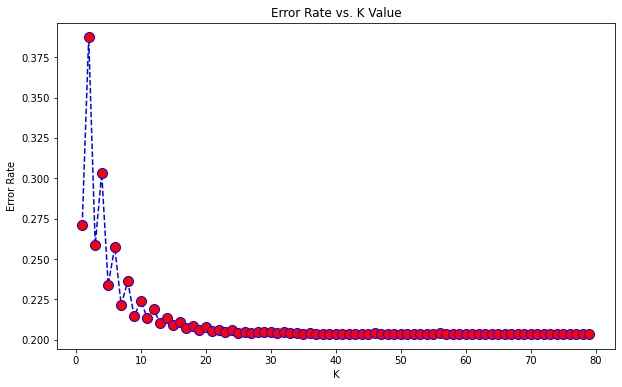

In [23]:
# Code to create the graph with Error Rate vs. K-values.
plt.figure(figsize=(10, 6))
plt.plot(range(1, 80), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


**<span >\<explain the result and your choice for k based on the graph></span>** <br>
I am thinking to take 21, because from there on the error rate seems to stay constant. But first I want to see what the grid search will find with the medium dataset.

*Note:* +0.5 if you also use the GridSearch technique to decide on k.

In [24]:
from sklearn.model_selection import GridSearchCV

## Note
For the extra point I am going to try and find the best k with the medium sized dataset. <br>
So we need to scale the variables first:

In [25]:
X_train_scaled_medium = scaler.transform(X_train_medium)
X_test_scaled_medium = scaler.transform(X_test_medium)

In [26]:
# Code to find best neighbor
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train_scaled_medium, y_train_medium)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 29


Now that we know what we want k to be, we can create the model.

In [27]:
# code to create the model with the selected k
knn = KNeighborsClassifier(n_neighbors = 29)

knn.fit(X_train_scaled_medium, y_train_medium)
y_pred_knn = knn.predict(X_test_scaled_medium)


Lets find out how good it is:

In [28]:
# code to show its accuracy score AND confusion matrix.
print(metrics.accuracy_score(y_test_medium, y_pred_knn))
print(confusion_matrix(y_test_medium, y_pred_knn))


0.7967145790554415
[[  0 198]
 [  0 776]]


**<span >\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers, the NB, and the SVM kernels?></span>** <br> <br>

First I wanted to take 21 as the K value, but according to the grid search, 29 seemed to be the best K for the medium sized dataset. <br><br>

The K value is the number of nearest neighbors that should be used to classify the datapoint. In our case, 29 neighbors seemed to be the best number. <br><br>

The KNN performed exactly the same as the Polynomial model. And it out performed the dummy, gaussian, RDF and sigmoid models. <br><br>

The score of the KNN was 80% rounded up and exactly the same as the polynomial kernal.<br>
It predicted 0 times the annual income and that was right. It predicted 776 times the Monthly debt which was right. And it predicted 198 times the Monthly debt but was Annual Income. It predicted 0 times monthly debt, which is also right.


One more basic technique to go.

## 2.4. Decision Trees
The last technique that was discussed in detail, were the Decision Trees. 

**<span >\<explain briefly in your own words how a Decision Tree method works></span>** <br><br>

A decision tree works by splitting up the population of data points into smaller segments, and based on some condition the segment gets classified a certain class.

The following variations were discussed:

* ID3 (or entropy with sklearn)
* Gini
* Random Forest
* Extra trees

Hopefully we have the hang of this now, so lets do each of them in one go:

In [29]:
# code to create the models, fit the data, and show its accuracy score AND confusion matrix.
# make sure to print some text between to indicate which result belongs to which model.
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

ent_dtc = DecisionTreeClassifier(criterion = "entropy")
ent_dtc.fit(X_train_scaled,y_train)
y_pred = ent_dtc.predict(X_test_scaled)
print('Entropy')
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print()

gini_dtc = DecisionTreeClassifier(criterion = "gini")
gini_dtc.fit(X_train_scaled,y_train)
y_pred = gini_dtc.predict(X_test_scaled)
print('gini')
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print()

rfc = RandomForestClassifier(random_state=0)
rfcModel = rfc.fit(X_train_scaled, y_train)
y_pred = rfcModel.predict(X_test_scaled)
print('Random forest')
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print()

erfc = ExtraTreesClassifier(random_state=0)
erfc = erfc.fit(X_train_scaled, y_train)
y_pred = erfc.predict(X_test_scaled)
print('Extra trees')
print(metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Entropy
0.7283459162663006
[[ 368 1115]
 [ 864 4938]]

gini
0.7250514756348662
[[ 356 1127]
 [ 876 4926]]

Random forest
0.7714481811942348
[[ 138 1345]
 [ 320 5482]]

Extra trees
0.7640356897735072
[[ 173 1310]
 [ 409 5393]]


**<span >\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers, the NB, the SVM kernels, and the knn?></span>** <br><br>

Entropy <br>
Entropy performed a score of 73% rounded up. <br>
368 times it predicted annual income and that was true. 4938 times it predicted Monthly debt and that was also right. <br>
1115 times it predicted Monthly Debt but was annual income. And it predicted 864 times Annual income, but was Monthly Debt <br><br>

Gini <br>
gini performed a score of 77%. <br>
356 times it predicted annual income and that was true. 4926 times it predicted Monthly debt and that was also right. <br>
1127 times it predicted Monthly Debt but was annual income. And it predicted 876 times Annual income, but was Monthly Debt <br><br>

Random forest <br>
Random forst performed a score of 77%. <br>
138 times it predicted annual income and that was true. 5482 times it predicted Monthly debt and that was also right. <br>
1345 times it predicted Monthly Debt but was annual income. And it predicted 320 times Annual income, but was Monthly Debt <br><br>

Extra trees <br>
Extra trees performed a score of 76%. <br>
173 times it predicted annual income and that was true. 5393 times it predicted Monthly debt and that was also right. <br>
1310 times it predicted Monthly Debt but was annual income. And it predicted 409 times Annual income, but was Monthly Debt <br><br>

These models performed slightly worse than the Dummy, Gaussian, Linear SVM, RBF, Polynomial and KNN models. But Performed better than the Sigmoid model.

One last set of techniques to explore.

## 2.5. Other Models
In the Jupyter Notebook from the lecture, in chapter 5.4 a few more techniques were simply shown:

* Linear Discriminant Analysis
* Quadratic Discriminant Analysis
* Logistic Regression Classifier
* Multinomial Logistic Regression Classification
* Adaptive Boosting
* Gradient Boosting
* Histogram Gradient Boosting
* XGBoost
* Stacking

Out of curiousity lets see how these perform.

In [30]:
# code to create the models, fit the data, and show its accuracy score (the confusion matrix is here optional).
# make sure to print some text between to indicate which result belongs to which model.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

lda = LinearDiscriminantAnalysis()
ldaModel=lda.fit(X_train_scaled, y_train)
y_pred=ldaModel.predict(X_test_scaled)
print('linear discriminant')
print(metrics.accuracy_score(y_test, y_pred))

print()


qda = QuadraticDiscriminantAnalysis()
qdaModel=qda.fit(X_train_scaled, y_train)
y_pred=ldaModel.predict(X_test_scaled)
print('quadratic discriminant')
print(metrics.accuracy_score(y_test, y_pred))

print()


logreg = LogisticRegression()
lrModel = logreg.fit(X_train_scaled, y_train)
y_pred = lrModel.predict(X_test_scaled)
print('logistic regression')
print(metrics.accuracy_score(y_test, y_pred))

print()


logreg = LogisticRegression(multi_class='multinomial')
lrModel = logreg.fit(X_train_scaled, y_train)
y_pred = lrModel.predict(X_test_scaled)
print('multinomial logistic regression')
print(metrics.accuracy_score(y_test, y_pred))

print()


adaBst = AdaBoostClassifier(random_state=0)
adaBst = adaBst.fit(X_train_scaled, y_train)
y_pred = adaBst.predict(X_test_scaled)
print('Adaptive boost')
print(metrics.accuracy_score(y_test, y_pred))

print()


gradBst = GradientBoostingClassifier(random_state=0)
gradBst = gradBst.fit(X_train_scaled, y_train)
y_pred = gradBst.predict(X_test_scaled)
print('Gradient boost')
print(metrics.accuracy_score(y_test, y_pred))

print()


histBst = HistGradientBoostingClassifier(random_state=0)
histBst = histBst.fit(X_train_scaled, y_train)
y_pred = histBst.predict(X_test_scaled)
print('histogram gradient boost')
print(metrics.accuracy_score(y_test, y_pred))

print()

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))]

stackCl = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())
stackCl.fit(X_train_scaled, y_train)
y_pred = stackCl.predict(X_test_scaled)
print('stacking')
print(metrics.accuracy_score(y_test, y_pred))

c:\Users\ruben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


linear discriminant
0.7964310226492793

quadratic discriminant
0.7964310226492793

logistic regression
0.7964310226492793

multinomial logistic regression
0.7964310226492793

Adaptive boost
0.7962937542896362

Gradient boost
0.7964310226492793

histogram gradient boost
0.7964310226492793



c:\Users\ruben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ruben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ruben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ruben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ruben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

stacking
0.7964310226492793


c:\Users\ruben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
# multiclass classification
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# load data
loan_df = pd.read_csv('../data/loan.csv')
loan_df = loan_df[['Loan Status', 'Annual Income', 'Monthly Debt']].dropna()

# split data into X and y
X = loan_df[['Annual Income', 'Monthly Debt']]
Y = loan_df[['Loan Status']]

# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)

# fit model no training data
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

c:\Users\ruben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ruben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 78.73%


**<span >\<which performed best?></span>**<br>

stacking, histogram gradient boost, Gradient boost, multinomial logistic regression, logistic regression, quadratic discriminant and the linear discriminant scored the highest.

<font size="5"><center>-----Chapters 1 and 2 are required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 3. Visualisation

With two input parameters we can actually determine visually where a model will classify a variable into which category. An overview of such plots is shown at https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

We cannot copy that code since it does a comparison. What we want is a function that takes the X and Y data as input, as well as the model to be used and then shows the decision areas.

In [32]:
# the code for the function


In [33]:
# an example of using the function


# 4. Categorical Input
With classification we have a categorical output variable, but what if we also have one or more categorical input variables.

One popular technique is one-hot-encoding, but there are others.

In this chapter we'll discuss **<span style ='background:yellow'>\<your chosen technique></span>**.

**<span style ='background:yellow'>\<explain the technique in detail. What does it do and how does it work></span>**

In [34]:
# example code of using this technique


# 5. Performance
Some models get higher accuracy scores than others. In the Jupyter Notebook from the lecture the UFC data was used and the QDA had the highest accuracy score: 0.6747. The big question is, can it be done better? First areas to look for improvement are to simply increase the number of input variables, or tweak some parameters of some of the models, or a combination of both.

In this chapter we'll give it an attempt.

First we need to load the data:

In [35]:
# code to load the UFC data


**<span style ='background:yellow'>\<explain your attempt, what did you do.></span>**

In [36]:
# code that will generate an accuracy score for the outcome that is higher than 0.6747


# 6. A New Technique

Many techniques were discussed in class and the lecture Jupyter Notebook, but there are a lot more. In this chapter the \<your chosen new technique> is discussed.

**<span style ='background:yellow'>\<explain in detail this new technique. Note that other students should be able to understand it from your explanation alone!></span>**

In [37]:
# code on using this technique


**<span style ='background:yellow'>\<feel free to use more cells for this, you probably need them></span>**